In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
card_01 = pd.read_csv("card_202001.csv")
card_02 = pd.read_csv("card_202002.csv")
card_03 = pd.read_csv("card_202003.csv")
card_04 = pd.read_csv("card_202004.csv")
card_05 = pd.read_csv("card_202005.csv")
card_06 = pd.read_csv("card_202006.csv")

card_01.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230.0
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550.0
2,20200104,1174066000,성내3동,7021,한의원,53,4589800.0
3,20200104,1174066000,성내3동,7020,의원,339,9267240.0
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000.0


### 데이터 가공

In [3]:
adstrd_code_06 = card_06['adstrd_code']
mrhst_induty_cl_code_06 = card_06['mrhst_induty_cl_code']

adstrd_code_new = []
mrhst_induty_cl_code_new = []

for i in adstrd_code_06:
    adstrd_code_new.append(int(i/100000))
    
for i in mrhst_induty_cl_code_06:
    mrhst_induty_cl_code_new.append(int(i/100))

adstrd_code_new

data_card06 = {"receipt_dttm" : card_06['receipt_dttm'], "adstrd_code" : adstrd_code_new, "adstrd_nm" : card_06['adstrd_nm'],
               "mrhst_induty_cl_code": mrhst_induty_cl_code_new, "mrhst_induty_cl_nm" : card_06['mrhst_induty_cl_nm'],
               "selng_cascnt" : card_06['selng_cascnt'], "salamt" : card_06['salamt']}

df_card06 = pd.DataFrame(data_card06)

df_card06.to_csv("df_card06.csv", encoding = 'utf-8-sig')

### 지역코드 다섯자리, 업종코드 두 자리로 csv 파일 변환 완료

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
adstrd=pd.read_csv('adstrd_master.csv')
adstrd['adstrd_code']=adstrd['adstrd_code'].astype(str)
adstrd['exp']=adstrd['adstrd_code'].apply(lambda x:x[:5])
adstrd['total_adstrd']=adstrd['brtc_nm']+' '+adstrd['signgu_nm']

adstrd_name=adstrd[['exp','total_adstrd']]
adstrd_name=adstrd_name.drop_duplicates(['exp'],keep='first')
adstrd_name=adstrd_name.reset_index()
adstrd_name=adstrd_name.drop(['index'],axis=1)
adstrd_name_seoul = adstrd_name[0:25]
adstrd_name_seoul

,exp,total_adstrd
0,11110,서울특별시 종로구
1,11140,서울특별시 중구
2,11170,서울특별시 용산구
3,11200,서울특별시 성동구
4,11215,서울특별시 광진구
5,11230,서울특별시 동대문구
6,11260,서울특별시 중랑구
7,11290,서울특별시 성북구
8,11305,서울특별시 강북구
9,11320,서울특별시 도봉구


In [6]:
card_01 = pd.read_csv("df_card01.csv")
card_02 = pd.read_csv("df_card02.csv")
card_03 = pd.read_csv("df_card03.csv")
card_04 = pd.read_csv("df_card04.csv")
card_05 = pd.read_csv("df_card05.csv")
card_06 = pd.read_csv("df_card06.csv")

card_01.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200104,11740,성내3동,70,약국,463,5843230.0
1,1,20200104,11740,성내3동,70,치과의원,33,7835550.0
2,2,20200104,11740,성내3동,70,한의원,53,4589800.0
3,3,20200104,11740,성내3동,70,의원,339,9267240.0
4,4,20200104,11740,성내3동,61,자동차정비,19,4441000.0


In [7]:
card_01['mrhst_induty_cl_code'].value_counts()
code = []
for i in card_01['mrhst_induty_cl_code'].value_counts().index:
    code.append(i)
print(code , '\n')
print(len(code), "\n")
code.sort()
print(code)

[80, 70, 83, 71, 40, 21, 51, 61, 42, 44, 91, 50, 22, 93, 92, 90, 99, 20, 10, 52, 33, 31, 82, 84, 34, 81, 43, 32, 30, 11, 60, 41, 62, 96, 95] 

35 

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


In [8]:
total_sum = []
seoul01_sum = []
seoul02_sum = []
seoul03_sum = []
seoul04_sum = []
seoul05_sum = []
seoul06_sum = []

In [9]:
is_code = card_01['adstrd_code'] == 11110
for i in code:
    is_name = card_01['mrhst_induty_cl_code'] == i
    seoul = card_01[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul01_sum.append(sum_num)
total_sum.append(seoul01_sum)
print(total_sum[0])

[1658878765, 10639312384, 969513145, 1084754926, 570389563, 3714010, 639997665, 6316106, 168367264, 49791180, 6450973823, 70993930, 1330809615, 501161683, 1943586746, 6936478406, 707090250, 88075962, 5256900, 383771379, -1570071505, 16278915207, 1365997245, 35752952002, 572897331, 295552806, 1944047931, 197884836, 99526188, 1693455449, 60137960, 331294552, 0, 1989700, -38157124652]


In [10]:
is_code = card_02['adstrd_code'] == 11110
for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul02_sum.append(sum_num)
total_sum.append(seoul02_sum)
print(total_sum[1])

[1281206097, 2092216103, 1205847218, 888409806, 462377421, 6487630, 627607471, 34554368, 380586399, 73805810, 5337654839, 122921360, 809813506, 478581291, 1602902159, 4232174123, 3135672112, 139970502, 19132500, 406942474, -911994270, 14077030940, 1406689138, 23225418526, 430430625, 228158300, 1337038124, 219823545, 155476075, 2386670576, 104084110, 512978851, 0, 14130200, -31651826851]


In [11]:
is_code = card_03['adstrd_code'] == 11110
for i in code:
    is_name = card_03['mrhst_induty_cl_code'] == i
    seoul = card_03[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul03_sum.append(sum_num)
total_sum.append(seoul03_sum)
print(total_sum[2])

[1075959446, 373879893, 1233087152, 643532748, 517151745, 7958300, 857365191, 34718763, 507725208, 87747500, 12912683634, 147544890, 1072123939, 604139348, 1829765996, 5426378082, 1917917916, 129086560, 55732600, 545954968, 8024602449, 16089263135, 1687197368, 26118233298, 418802002, 232482800, 1737715194, 226953819, 243849175, 2867442989, 140530299, 394812090, 0, 38428600, -36002068321]


In [12]:
is_code = card_04['adstrd_code'] == 11110
for i in code:
    is_name = card_04['mrhst_induty_cl_code'] == i
    seoul = card_04[is_code & is_name]
    seoul = seoul.astype({'salamt': int})
    sum_num = sum(seoul['salamt'])
    seoul04_sum.append(sum_num)
total_sum.append(seoul04_sum)
print(total_sum[3])

[1029023598, -283564004, 1531989174, 688788414, 571545171, 18871400, 959414238, 47350893, 455831121, 112341850, 14172329790, 148835895, 1295762208, 696717034, 2150762260, 5706881255, 1480442418, 132034170, 53732400, 574088457, 2196377136, 18625537657, 1831832524, 29885114021, 230919527, 136810200, 1854674314, 138250940, 192466282, 2851410621, 166148397, 564079932, 0, 37636408, -44453920706]


In [13]:
is_code = card_05['adstrd_code'] == 11110
for i in code:
    is_name = card_05['mrhst_induty_cl_code'] == i
    seoul = card_05[is_code & is_name]
    seoul = seoul.astype({'salamt': int})
    sum_num = sum(seoul['salamt'])
    seoul05_sum.append(sum_num)
total_sum.append(seoul05_sum)
print(total_sum[4])

[1520526845, 103185885, 1810303137, 929814360, 838341953, 29936780, 974792996, 113293172, 509686512, 126005300, 12338429880, 153883301, 1731542816, 930944262, 2269380696, 6228174490, 1519128575, 160003095, 40027231, 634823262, -4915675105, 19272233938, 2100191794, 34476466517, 179902800, 215045195, 2150161243, 224607284, 237327963, 2822325863, 170533830, 726338254, 0, 46009156, -40016513128]


In [14]:
is_code = card_06['adstrd_code'] == 11110
for i in code:
    is_name = card_06['mrhst_induty_cl_code'] == i
    seoul = card_06[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul06_sum.append(sum_num)
total_sum.append(seoul06_sum)
print(total_sum[5])

[668990715, 180897634, 749945356, 367896183, 310993291, 13163840, 510777530, 29492440, 248410047, 54862000, 6791201422, 87583106, 812249082, 406196642, 1046581751, 2607400252, 430666395, 58086547, 22835000, 289181034, 13252371907, 8800759318, 811224255, 15875991893, 8988000, 113234250, 904234169, 81145010, 109416396, 1388858709, 72557458, 253048824, 0, 16789200, -14278165815]


In [15]:
print(code, '\n')

for i in total_sum:
    print(i)
    print('\n')
print(len(total_sum))

[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99] 

[1658878765, 10639312384, 969513145, 1084754926, 570389563, 3714010, 639997665, 6316106, 168367264, 49791180, 6450973823, 70993930, 1330809615, 501161683, 1943586746, 6936478406, 707090250, 88075962, 5256900, 383771379, -1570071505, 16278915207, 1365997245, 35752952002, 572897331, 295552806, 1944047931, 197884836, 99526188, 1693455449, 60137960, 331294552, 0, 1989700, -38157124652]


[1281206097, 2092216103, 1205847218, 888409806, 462377421, 6487630, 627607471, 34554368, 380586399, 73805810, 5337654839, 122921360, 809813506, 478581291, 1602902159, 4232174123, 3135672112, 139970502, 19132500, 406942474, -911994270, 14077030940, 1406689138, 23225418526, 430430625, 228158300, 1337038124, 219823545, 155476075, 2386670576, 104084110, 512978851, 0, 14130200, -31651826851]


[1075959446, 373879893, 1233087152, 643532748, 517151745, 7958300, 857365191, 

In [16]:
month_total = []
for i in range(0, len(code)):
    sum_code = 0
    for j in range(0, len(total_sum)):
        sum_code = sum_code + total_sum[j][i]
    month_total.append(sum_code)
    
month_total

[7234585466,
 13105927895,
 7500685182,
 4603196437,
 3270799144,
 80131960,
 4569955091,
 265725742,
 2270606551,
 504553640,
 58003273388,
 731762482,
 7052301166,
 3617740260,
 10842979608,
 31137486608,
 9190917666,
 707256836,
 196716631,
 2834761574,
 16075610612,
 93143740195,
 9203132324,
 165334176257,
 1841940285,
 1221283551,
 9927870975,
 1088665434,
 1038062079,
 14010164207,
 713992054,
 2782552503,
 0,
 154983264,
 -204559619473]

In [17]:
mean_total = []
month_day = [28, 29, 31, 30, 31, 14]
month = sum(month_day)

for i in month_total:
    mean_total.append(i/month)
mean_total

[44383959.91411043,
 80404465.61349693,
 46016473.50920245,
 28240468.938650306,
 20066252.417177916,
 491607.1165644172,
 28036534.300613496,
 1630219.2760736197,
 13930101.539877301,
 3095421.1042944784,
 355848302.993865,
 4489340.380368099,
 43265651.32515337,
 22194725.521472394,
 66521347.288343556,
 191027525.202454,
 56385997.95092025,
 4338998.993865031,
 1206850.4969325154,
 17391175.300613496,
 98623377.98773006,
 571433988.9263804,
 56460934.503067486,
 1014320099.7361963,
 11300247.147239264,
 7492537.122699386,
 60907183.89570552,
 6678929.042944785,
 6368479.012269938,
 85951927.65030675,
 4380319.349693252,
 17070874.251533743,
 0.0,
 950817.5705521472,
 -1254966990.6319017]

### 2월 상반기 상대값 계산

In [18]:
is_date = card_02['receipt_dttm'] < 20200215
df_card02_1 = card_02[is_date]
df_card02_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200201,11680,논현2동,40,대형할인점,67,1007350.0
1,1,20200201,11410,북가좌2동,71,사우나,7,49000.0
2,2,20200201,11260,면목3.8동,44,기타잡화,11,79400.0
3,3,20200201,11320,창5동,52,컴 퓨 터,1,15000.0
4,4,20200201,11470,신월6동,90,기타건축자재,3,24500.0


In [19]:
seoul02_sum_1 = []

is_code = df_card02_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_1['mrhst_induty_cl_code'] == i
    seoul = df_card02_1[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul02_sum_1.append(sum_num)
    
print(seoul02_sum_1)
print(code)

mean02_1 = []

for i in seoul02_sum_1:
    mean02_1.append(i/14)

Jongrogu02_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_1, 'mean' : mean02_1})
Jongrogu02_1

[442947213, 926173456, 357797065, 346234416, 152128506, 1564430, 189889571, 11561740, 112853564, 13390200, -290438401, 43336060, 256103146, 152853871, 495467335, 1332284130, 347874653, 67993102, 7157000, 108793918, 4506793061, 4447717132, 392575907, 7271613954, 139002100, 70263600, 399135561, 63789510, 47113262, 622940491, 29061260, 177383213, 0, 2192900, -8424418907]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,442947213,3.163909e+07
1,11,926173456,6.615525e+07
2,20,357797065,2.555693e+07
3,21,346234416,2.473103e+07
4,22,152128506,1.086632e+07
5,30,1564430,1.117450e+05
6,31,189889571,1.356354e+07
7,32,11561740,8.258386e+05
8,33,112853564,8.060969e+06
9,34,13390200,9.564429e+05


In [20]:
per_02_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_1['mean'][i]
    if(a != 0):
        per_02_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_1.append(0)
per_02_1

[-28.71504321812771,
 -17.721924581713974,
 -44.46133902639281,
 -12.426986364810414,
 -45.847776499409356,
 -77.26945029174377,
 -51.62190647287854,
 -49.341871762331124,
 -42.132734394886114,
 -69.10136537429683,
 -105.8298999593055,
 -31.04927239023363,
 -57.719157583771775,
 -50.80753022922342,
 -46.798245418620894,
 -50.183539234986306,
 -55.93198594865968,
 11.93019748849967,
 -57.64062847770683,
 -55.31645211705152,
 226.40718320505974,
 -44.404062934017674,
 -50.33533103713993,
 -48.793186997933766,
 -12.137130283941703,
 -33.01563289925476,
 -53.191592345838856,
 -31.779578101047967,
 -47.157979267634914,
 -48.23181914177342,
 -52.61066328737763,
 -25.77867241414636,
 0,
 -83.52620743064784,
 -52.050993202628646]

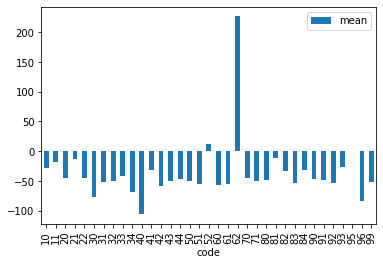

In [21]:
data_02_1 = pd.DataFrame({"code": code, "mean": per_02_1})
data_02_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 2월 전체 상대값 계산

In [22]:
seoul02_sum = []

is_code = card_02['adstrd_code'] == 11110

for i in code:
    is_name = card_02['mrhst_induty_cl_code'] == i
    seoul = card_02[is_code & is_name]
    seoul = seoul.astype({'salamt': int})
    sum_num = sum(seoul['salamt'])
    seoul02_sum.append(sum_num)
    
print(seoul02_sum)
print(code)

mean02 = []

for i in seoul02_sum:
    mean02.append(i/29)

Jongrogu02 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum, 'mean' : mean02})
Jongrogu02

[1281206097, 2092216103, 1205847218, 888409806, 462377421, 6487630, 627607471, 34554368, 380586399, 73805810, 5337654839, 122921360, 809813506, 478581291, 1602902159, 4232174123, 3135672112, 139970502, 19132500, 406942474, -911994270, 14077030940, 1406689138, 23225418526, 430430625, 228158300, 1337038124, 219823545, 155476075, 2386670576, 104084110, 512978851, 0, 14130200, -31651826851]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,1281206097,4.417952e+07
1,11,2092216103,7.214538e+07
2,20,1205847218,4.158094e+07
3,21,888409806,3.063482e+07
4,22,462377421,1.594405e+07
5,30,6487630,2.237114e+05
6,31,627607471,2.164164e+07
7,32,34554368,1.191530e+06
8,33,380586399,1.312367e+07
9,34,73805810,2.545028e+06


In [23]:
per_02 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02['mean'][i]
    if(a != 0):
        per_02.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02.append(0)
per_02

[-0.46061534008941973,
 -10.271920456668727,
 -9.63901537694167,
 8.47844263175274,
 -20.54296602812124,
 -54.493868828884,
 -22.809157868842156,
 -26.909836699742595,
 -5.789136615653997,
 -17.780881977460183,
 -48.27653753993978,
 -5.58373330873719,
 -35.45779897010848,
 -25.6453830800236,
 -16.910149155886632,
 -23.604182921036358,
 91.76148065312279,
 11.236924491273436,
 -45.333628234215645,
 -19.312531436830145,
 -131.88704231949407,
 -15.053204848384071,
 -14.088347231722365,
 -21.043021714265233,
 31.346112624215532,
 5.004852927207246,
 -24.30324315190921,
 13.493079394015886,
 -15.81594356850498,
 -4.249982950770238,
 -18.06288640505969,
 3.6205037651334835,
 0,
 -48.75480944476867,
 -13.030198136340395]

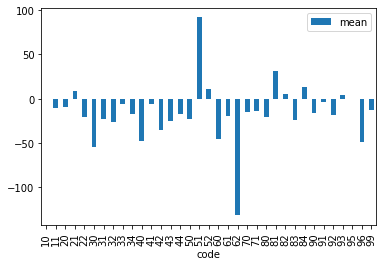

In [24]:
data_02 = pd.DataFrame({"code": code, "mean": per_02})
data_02.plot(x = "code", y = "mean", kind = 'bar')

### 날짜 별로 구분

In [25]:
count = card_02['receipt_dttm'].value_counts().index
date02 = []
for i in count:
    date02.append(i)
date02.sort()
date02

[20200201,
 20200202,
 20200203,
 20200205,
 20200206,
 20200214,
 20200215,
 20200216,
 20200217,
 20200218,
 20200219,
 20200220,
 20200221,
 20200222,
 20200223,
 20200224,
 20200225,
 20200226,
 20200227,
 20200228,
 20200229]

In [26]:
data_day = []
is_code = card_02['adstrd_code'] == 11110
num = 0

for i in date02:
    sum_day = []
    is_date = card_02['receipt_dttm'] == i
    for j in code:
        is_name = card_02['mrhst_induty_cl_code'] == j
        seoul = card_02[is_code & is_date & is_name]
        seoul = seoul.astype({'salamt' : int})
        sum_num = sum(seoul['salamt'])
        sum_day.append(sum_num)
    data_day.append(sum_day)
    print(data_day[num], " ", i, "\n")
    num = num+1

[143317876, 178590806, 162464550, 83395860, 23965390, 43100, 60975629, 2232490, 21292638, 2790900, -1819222147, 17131730, 46728198, 32323321, 112289110, 258452463, 97537265, 7335650, 2436000, 21419228, -1567587953, 1301397571, 93316718, 1476607445, 28686800, 13831100, 89664542, 16768170, 19958274, 209910720, 4969780, 46322743, 0, 231000, -2119962406]   20200201 

[41424521, 4468848, 49597800, 28435290, 22436710, 290000, 12699370, 1898300, 15193498, 3166800, 234310896, 4614600, 65198559, 21617625, 68780910, 203406962, 60002754, 8653085, 1895000, 14651634, 250735906, 505746042, 63572050, 987055205, 23903900, 13509900, 60166265, 10956090, 5420557, 132108030, 4150270, 29303250, 0, 612000, 30418950]   20200202 

[57402241, 217606570, 12862110, 19437180, 16759440, 257500, 2711450, 552500, 10353890, 1877800, 150244193, 4228400, 30417375, 5375925, 27270110, 221175112, 19638840, 1510960, 0, 5688260, 135801897, 126534600, 27532310, 754009499, 14945800, 9928600, 38376650, 6709610, 429520, 4435250

In [27]:
data_day02 = pd.DataFrame({"date" : date02, "day_sum" : data_day})
data_day02

,date,day_sum
0,20200201,"[143317876, 178590806, 162464550, 83395860, 23..."
1,20200202,"[41424521, 4468848, 49597800, 28435290, 224367..."
2,20200203,"[57402241, 217606570, 12862110, 19437180, 1675..."
3,20200205,"[115040692, 142158943, 42636720, 34172560, 268..."
4,20200206,"[40547051, 256804336, 52454865, 142336236, 315..."
5,20200214,"[45214832, 126543953, 37781020, 38457290, 3054..."
6,20200215,"[58737142, 58668697, 49901400, 36813590, 39593..."
7,20200216,"[36584075, 4923880, 55378600, 51532080, 201369..."
8,20200217,"[19594238, 145269600, 16317740, 24176310, 1237..."
9,20200218,"[48459387, 141736149, 67495180, 35379920, 1555..."


In [28]:
per= []
for i in range(0, len(data_day)):
    per_day = []
    for j in range(0, len(mean_total)):
        a = mean_total[j]
        b = data_day02['day_sum'][i][j]
        if(a != 0):
            per_day.append( ( ( b - a ) / a ) * 100 )
        else:
            per_day.append(0)
    per.append(per_day)

In [29]:
per[0]

[222.90466257932243,
 122.11553131698349,
 253.0573675262405,
 195.30621527981512,
 19.431319320413756,
 -91.23283643629833,
 117.48632818238782,
 36.94415424757756,
 52.8534299555978,
 -9.837792469399286,
 -611.2353021482203,
 281.6090683370126,
 8.002992139941748,
 45.63514637172983,
 68.80161719105209,
 35.295928021937144,
 72.98135804016242,
 69.06318739349732,
 101.84770244463976,
 23.16147488458936,
 -1689.4689321988412,
 127.74241578543257,
 65.27660907725529,
 45.576080507922015,
 153.85993444407455,
 84.5983513127657,
 47.21505127135277,
 151.0607597742467,
 213.39153291621207,
 144.2187461507745,
 13.457024551144366,
 171.35542279469433,
 0,
 -75.7051187152698,
 68.92575038428343]

### 2월 하반기 상대값 계산

In [30]:
is_date = card_02['receipt_dttm'] > 20200214
df_card02_2 = card_02[is_date]
df_card02_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
160531,160531,20200215,11710,거여1동,70,동물병원,13,730100.0
160532,160532,20200215,11680,대치4동,70,약국,442,7531530.0
160533,160533,20200215,11650,서초1동,80,서양음식,1840,19929464.0
160534,160534,20200215,11440,대흥동,71,미 용 원,59,2890700.0
160535,160535,20200215,11260,망우본동,70,약국,394,6041060.0


In [31]:
seoul02_sum_2 = []

is_code = df_card02_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card02_2['mrhst_induty_cl_code'] == i
    seoul = df_card02_2[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul02_sum_2.append(sum_num)
    
print(seoul02_sum_2)
print(code)

mean02_2 = []

for i in seoul02_sum_2:
    mean02_2.append(i/15)

Jongrogu02_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul02_sum_2, 'mean' : mean02_2})
Jongrogu02_2

[838258884, 1166042647, 848050153, 542175390, 310248915, 4923200, 437717900, 22992628, 267732835, 60415610, 5628093240, 79585300, 553710360, 325727420, 1107434824, 2899889993, 2787797459, 71977400, 11975500, 298148556, -5418787331, 9629313808, 1014113231, 15953804572, 291428525, 157894700, 937902563, 156034035, 108362813, 1763730085, 75022850, 335595638, 0, 11937300, -23227407944]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,838258884,5.588393e+07
1,11,1166042647,7.773618e+07
2,20,848050153,5.653668e+07
3,21,542175390,3.614503e+07
4,22,310248915,2.068326e+07
5,30,4923200,3.282133e+05
6,31,437717900,2.918119e+07
7,32,22992628,1.532842e+06
8,33,267732835,1.784886e+07
9,34,60415610,4.027707e+06


In [32]:
per_02_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu02_2['mean'][i]
    if(a != 0):
        per_02_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_02_2.append(0)
per_02_2

[25.910184012746313,
 -3.3185832732931617,
 22.86182002921273,
 27.990176361878344,
 3.074857078414343,
 -33.23665946354822,
 4.082740828258463,
 -5.9732706413266285,
 28.13155464496265,
 30.118235859587372,
 5.439934051468197,
 18.184103167326175,
 -14.68053093068941,
 -2.160712407437099,
 10.985407355998662,
 1.203216305316928,
 229.60871614811973,
 10.589869693862282,
 -33.847094673623886,
 14.291127864709791,
 -466.2949861424109,
 12.340929364873958,
 19.742170986667357,
 4.85713255049207,
 71.93047267182894,
 40.490639698571805,
 2.659216095758467,
 55.747559722742146,
 13.436623084016286,
 36.79973082749942,
 14.181705351770377,
 31.059734865794674,
 0,
 -16.301504657948097,
 23.389210592195322]

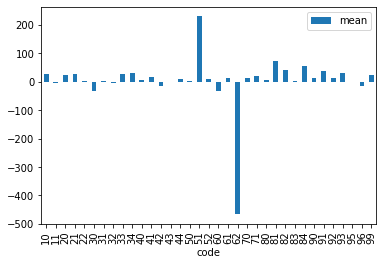

In [33]:
data_02_2 = pd.DataFrame({"code": code, "mean": per_02_2})
data_02_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 3월 상반기 상대값 계산

In [34]:
is_date = card_03['receipt_dttm'] < 20200316
df_card03_1 = card_03[is_date]
df_card03_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200301,11545,시흥4동,90,조명 기구,1,15000.0
1,1,20200301,11140,광희동,80,일반한식,952,25644550.0
2,2,20200301,11710,잠실본동,71,미 용 원,121,6493950.0
3,3,20200301,11620,서림동,83,정 육 점,50,1273200.0
4,4,20200301,11740,둔촌2동,71,미 용 원,47,1636300.0


In [35]:
seoul03_sum_1 = []

is_code = df_card03_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_1['mrhst_induty_cl_code'] == i
    seoul = df_card03_1[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul03_sum_1.append(sum_num)
    
print(seoul03_sum_1)
print(code)

mean03_1 = []

for i in seoul03_sum_1:
    mean03_1.append(i/15)

Jongrogu03_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_1, 'mean' : mean03_1})
Jongrogu03_1

[515558786, 266231640, 451844435, 341758818, 251431601, 3037800, 456724377, 18887541, 241846366, 37452050, 6900373371, 66515320, 516237559, 278794822, 740228810, 2418483508, 810055084, 60116650, 16239600, 280770045, 8028874656, 7511893593, 684778598, 12209104633, 210921251, 129460150, 846443832, 100886957, 116520260, 1636373775, 68004220, 183139330, 0, 13876200, -16916746698]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,515558786,3.437059e+07
1,11,266231640,1.774878e+07
2,20,451844435,3.012296e+07
3,21,341758818,2.278392e+07
4,22,251431601,1.676211e+07
5,30,3037800,2.025200e+05
6,31,456724377,3.044829e+07
7,32,18887541,1.259169e+06
8,33,241846366,1.612309e+07
9,34,37452050,2.496803e+06


In [36]:
per_03_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu03_1['mean'][i]
    if(a != 0):
        per_03_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_1.append(0)
per_03_1

[-22.56079493617619,
 -77.9256340247094,
 -34.538742245623645,
 -19.32173205233996,
 -16.466182200598833,
 -58.804501973993894,
 8.602195526476788,
 -22.76073418585092,
 15.742810779315263,
 -19.338815327279498,
 29.275561392218023,
 -1.2248060748943066,
 -20.45459570682965,
 -16.2579350274675,
 -25.81541212713739,
 -15.59738121729306,
 -4.225030629638258,
 -7.6336115234570014,
 -10.292119632732023,
 7.629315882634441,
 442.7296461763788,
 -12.36207227699249,
 -19.144259769818202,
 -19.755084309346156,
 24.43459466077822,
 15.190309041234812,
 -7.3515056998411525,
 0.701730623086304,
 21.976021564441844,
 26.921626986466627,
 3.49963791987336,
 -28.47883191706063,
 0,
 -2.70688840312461,
 -10.134440059484113]

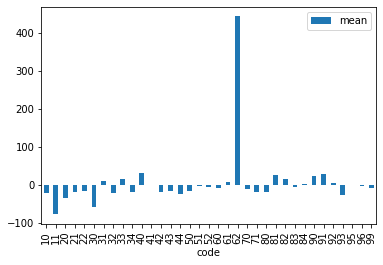

In [37]:
data_03_1 = pd.DataFrame({"code": code, "mean": per_03_1})
data_03_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 3월 하반기 상대값 계산

In [38]:
is_date = card_03['receipt_dttm'] > 20200315
df_card03_2 = card_03[is_date]
df_card03_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
376104,376104,20200316,11290,삼선동,10,기타숙박업,12,528000.0
376105,376105,20200316,11680,역삼1동,80,서양음식,5424,70725305.0
376106,376106,20200316,11440,서교동,80,일반한식,4441,131872050.0
376107,376107,20200316,11740,명일2동,40,편 의 점,404,2209050.0
376108,376108,20200316,11380,갈현1동,71,미 용 원,37,1616800.0


In [39]:
seoul03_sum_2 = []

is_code = df_card03_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card03_2['mrhst_induty_cl_code'] == i
    seoul = df_card03_2[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul03_sum_2.append(sum_num)
    
print(seoul03_sum_2)
print(code)

mean03_2 = []

for i in seoul03_sum_2:
    mean03_2.append(i/16)

Jongrogu03_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul03_sum_2, 'mean' : mean03_2})
Jongrogu03_2

[560400660, 107648253, 781242717, 301773930, 265720144, 4920500, 400640814, 15831222, 265878842, 50295450, 6012310263, 81029570, 555886380, 325344526, 1089537186, 3007894574, 1107862832, 68969910, 39493000, 265184923, -4272207, 8577369542, 1002418770, 13909128665, 207880751, 103022650, 891271362, 126066862, 127328915, 1231069214, 72526079, 211672760, 0, 24552400, -19085321623]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,560400660,3.502504e+07
1,11,107648253,6.728016e+06
2,20,781242717,4.882767e+07
3,21,301773930,1.886087e+07
4,22,265720144,1.660751e+07
5,30,4920500,3.075312e+05
6,31,400640814,2.504005e+07
7,32,15831222,9.894514e+05
8,33,265878842,1.661743e+07
9,34,50295450,3.143466e+06


In [40]:
per_03_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu03_2['mean'][i]
    if(a != 0):
        per_03_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_03_2.append(0)
per_03_2

[-21.086263330764833,
 -91.6322858921276,
 6.109108519007572,
 -33.213323525280614,
 -17.236618703236402,
 -37.44369443852366,
 -10.687781141151698,
 -39.30562657907641,
 19.291503923569888,
 1.5521158216200792,
 5.598196837256924,
 12.808290214446922,
 -19.69865774376658,
 -8.383490233624464,
 2.367250365255878,
 -1.5883126393635674,
 22.798974064925538,
 -0.6540591252765244,
 104.52512604285093,
 -4.698461138993128,
 -100.27074000399097,
 -6.1859100502218185,
 10.963755163486006,
 -14.295246462276323,
 14.975776796830303,
 -14.062279311334144,
 -8.542052739812123,
 17.970692970949973,
 24.96009128973298,
 -10.482722169960072,
 3.4828645043296182,
 -22.50222627695015,
 0,
 61.3900549932927,
 -4.951077570822464]

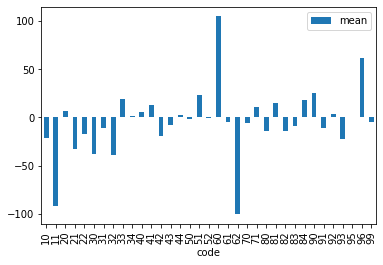

In [41]:
data_03_2 = pd.DataFrame({"code": code, "mean": per_03_2})
data_03_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 4월 상반기 상대값 계산

In [42]:
is_date = card_04['receipt_dttm'] < 20200416
df_card04_1 = card_04[is_date]
df_card04_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200401,11530,구로5동,92,가정용품수리,43,3458100.0
1,1,20200401,11680,신사동,42,스포츠의류,1,516800.0
2,2,20200401,11710,오금동,44,기타잡화,1,85000.0
3,3,20200401,11620,난향동,21,기타레져업,19,95300.0
4,4,20200401,11710,가락2동,70,제약회사,7,6700000.0


In [43]:
seoul04_sum_1 = []

is_code = df_card04_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_1['mrhst_induty_cl_code'] == i
    seoul = df_card04_1[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul04_sum_1.append(sum_num)
    
print(seoul04_sum_1)
print(code)

mean04_1 = []

for i in seoul04_sum_1:
    mean04_1.append(i/15)

Jongrogu04_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_1, 'mean' : mean04_1})
Jongrogu04_1

[407321791, -285726534, 652327564, 276216474, 265874508, 8847500, 471620129, 24088860, 224546957, 52659360, 6375381809, 78909680, 604971689, 312541080, 795662559, 2742306323, 568945508, 73822770, 18396400, 295305871, 5066376864, 8829995081, 845322545, 14298536492, 64269717, 43912100, 918723423, 66726270, 92202831, 1546095156, 87967900, 234447192, 0, 18009708, -23342173616]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,407321791,2.715479e+07
1,11,-285726534,-1.904844e+07
2,20,652327564,4.348850e+07
3,21,276216474,1.841443e+07
4,22,265874508,1.772497e+07
5,30,8847500,5.898333e+05
6,31,471620129,3.144134e+07
7,32,24088860,1.605924e+06
8,33,224546957,1.496980e+07
9,34,52659360,3.510624e+06


In [44]:
per_04_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu04_1['mean'][i]
    if(a != 0):
        per_04_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_1.append(0)
per_04_1

[-38.81846928661791,
 -123.69076823613945,
 -5.493617936694426,
 -34.794172008957865,
 -11.667775170482933,
 19.98063361152446,
 12.144181574701026,
 -1.4903072506991117,
 7.46366126965927,
 13.413454315778997,
 19.440067679811577,
 17.18080803893048,
 -6.781835710200398,
 -6.1215153129871265,
 -20.259927433407746,
 -4.2962937725454236,
 -32.73205775953762,
 13.425193390424859,
 1.6220873906012896,
 13.201423862205447,
 242.47301653165977,
 3.0156326261462634,
 -0.187914299803851,
 -6.022194928282475,
 -62.08359211818857,
 -60.92814375968507,
 0.5599410159538314,
 -33.39623805856961,
 -3.4800085207620706,
 19.91937030121064,
 33.88354132393001,
 -8.441638256483959,
 0,
 26.2752432417477,
 23.998871631658]

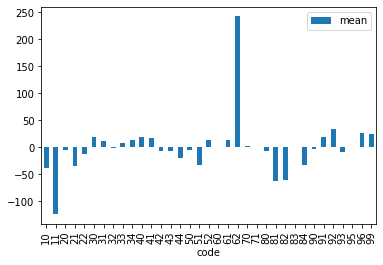

In [45]:
data_04_1 = pd.DataFrame({"code": code, "mean": per_04_1})
data_04_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 4월 하반기 상대값 계산

In [47]:
is_date = card_04['receipt_dttm'] > 20200415
df_card04_2 = card_04[is_date]
df_card04_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
385832,385832,20200416,11710,마천2동,80,일식회집,10,516000.0
385833,385833,20200416,11590,사당1동,44,악세 사리,30,451450.0
385834,385834,20200416,11710,잠실2동,80,일반한식,153,1770930.0
385835,385835,20200416,11170,남영동,70,한의원,8,252000.0
385836,385836,20200416,11680,압구정동,70,의원,169,67386370.0


In [48]:
seoul04_sum_2 = []

is_code = df_card04_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card04_2['mrhst_induty_cl_code'] == i
    seoul = df_card04_2[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul04_sum_2.append(sum_num)
    
print(seoul04_sum_2)
print(code)

mean04_2 = []

for i in seoul04_sum_2:
    mean04_2.append(i/15)

Jongrogu04_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul04_sum_2, 'mean' : mean04_2})
Jongrogu04_2

[621701807, 2162530, 879661610, 412571940, 305670663, 10023900, 487794109, 23262033, 231284164, 59682490, 7796947981, 69926215, 690790519, 384175954, 1355099701, 2964574932, 911496910, 58211400, 35336000, 278782586, -2869999728, 9795542576, 986509979, 15586577529, 166649810, 92898100, 935950891, 71524670, 100263451, 1305315465, 78180497, 329632740, 0, 19626700, -21111747090]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,621701807,4.144679e+07
1,11,2162530,1.441687e+05
2,20,879661610,5.864411e+07
3,21,412571940,2.750480e+07
4,22,305670663,2.037804e+07
5,30,10023900,6.682600e+05
6,31,487794109,3.251961e+07
7,32,23262033,1.550802e+06
8,33,231284164,1.541894e+07
9,34,59682490,3.978833e+06


In [49]:
per_04_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu04_2['mean'][i]
    if(a != 0):
        per_04_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_04_2.append(0)
per_04_2

[-6.617644722239664,
 -99.8206956969782,
 27.44155051691562,
 -2.605030887583647,
 1.5538117249794547,
 35.93375227562136,
 15.990111038635293,
 -4.8715579087554195,
 10.68795315330114,
 28.539301523355704,
 46.07250552930927,
 3.8403701143380897,
 6.441714977472173,
 15.3955710868714,
 35.80599874966274,
 3.460654997513985,
 7.768706549380007,
 -10.56093800696753,
 95.19678198094667,
 6.867450946099694,
 -294.00401720553947,
 14.280246605608546,
 16.482896558788333,
 2.4435155007033607,
 -1.683678342844139,
 -17.34166190643579,
 2.445593566617311,
 -28.606647822224023,
 4.958029284361006,
 1.2438387118470149,
 18.987514773285326,
 28.731051943784287,
 0,
 37.61279841587714,
 12.15034471076566]

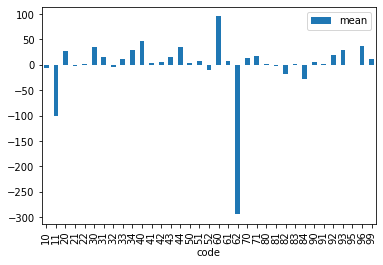

In [50]:
data_04_2 = pd.DataFrame({"code": code, "mean": per_04_2})
data_04_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 5월 상반기 상대값 계산

In [52]:
is_date = card_05['receipt_dttm'] < 20200516
df_card05_1 = card_05[is_date]
df_card05_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200501,11500,화곡2동,83,정 육 점,17.0,481200.0
1,1,20200501,11215,자양1동,80,스넥,188.0,2777400.0
2,2,20200501,11560,문래동,61,주 차 장,63.0,375000.0
3,3,20200501,11620,신사동,80,서양음식,406.0,3421500.0
4,4,20200501,11200,성수1가2동,61,주 차 장,37.0,259500.0


In [53]:
seoul05_sum_1 = []

is_code = df_card05_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_1['mrhst_induty_cl_code'] == i
    seoul = df_card05_1[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul05_sum_1.append(sum_num)
    
print(seoul05_sum_1)
print(code)

mean05_1 = []

for i in seoul05_sum_1:
    mean05_1.append(i/15)

Jongrogu05_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_1, 'mean' : mean05_1})
Jongrogu05_1

[725401703, -133845853, 664105530, 500497360, 421393586, 15161550, 399828233, 40086273, 233265694, 66892200, 7036864742, 64519650, 790720575, 416435792, 1050246391, 3108186783, 479951814, 57132615, 11517300, 292427727, 3526650206, 7947329580, 850438067, 15815293687, 170879800, 114759694, 937341161, 84950674, 101854754, 1340429457, 76963460, 344701234, 0, 20797750, -16794337270]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,725401703,4.836011e+07
1,11,-133845853,-8.923057e+06
2,20,664105530,4.427370e+07
3,21,500497360,3.336649e+07
4,22,421393586,2.809291e+07
5,30,15161550,1.010770e+06
6,31,399828233,2.665522e+07
7,32,40086273,2.672418e+06
8,33,233265694,1.555105e+07
9,34,66892200,4.459480e+06


In [54]:
per_05_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu05_1['mean'][i]
    if(a != 0):
        per_05_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_1.append(0)
per_05_1

[8.95853733402191,
 -111.09771304190947,
 -3.787277416757997,
 18.151333602682552,
 40.00075923137557,
 105.6052416538919,
 -4.926852771706292,
 63.92998409615882,
 11.636273591754765,
 44.066989587073444,
 31.832669198206414,
 -4.188374336469476,
 21.839619618422862,
 25.085512350555895,
 5.254070942329733,
 8.472562778789571,
 -43.254019148777346,
 -12.218440119820915,
 -36.37820078364397,
 12.098127142173553,
 138.39176727710932,
 -7.282033923911621,
 0.4161047498303148,
 3.946763229958879,
 0.8118363981960749,
 2.110221696309956,
 2.597767186769201,
 -15.205293689276198,
 6.623840955597939,
 3.967376000648754,
 17.13523429958693,
 34.615731614343105,
 0,
 45.82362690894591,
 -10.784706448500788]

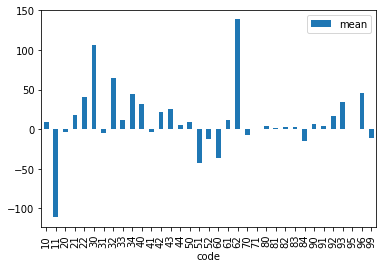

In [55]:
data_05_1 = pd.DataFrame({"code": code, "mean": per_05_1})
data_05_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 5월 하반기 상대값 계산

In [56]:
is_date = card_05['receipt_dttm'] > 20200515
df_card05_2 = card_05[is_date]
df_card05_2.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
389400,389400,20200516,11680,삼성1동,21,스크린골프,462.0,422000.0
389401,389401,20200516,11650,방배4동,83,미곡상,4949.0,190000.0
389402,389402,20200516,11650,서초4동,21,당구장,276.0,188800.0
389403,389403,20200516,11500,가양1동,40,편 의 점,33.0,30976350.0
389404,389404,20200516,11140,소공동,80,스넥,835.0,5590800.0


In [57]:
seoul05_sum_2 = []

is_code = df_card05_2['adstrd_code'] == 11110

for i in code:
    is_name = df_card05_2['mrhst_induty_cl_code'] == i
    seoul = df_card05_2[is_code & is_name]
    seoul = seoul.astype({'salamt': int})
    sum_num = sum(seoul['salamt'])
    seoul05_sum_2.append(sum_num)
    
print(seoul05_sum_2)
print(code)

mean05_2 = []

for i in seoul05_sum_2:
    mean05_2.append(i/16)

Jongrogu05_2 = pd.DataFrame({'code' : code, 'total_sum' : seoul05_sum_2, 'mean' : mean05_2})
Jongrogu05_2

[795125142, 237031738, 1146197607, 429317000, 416948367, 14775230, 574964763, 73206899, 276420818, 59113100, 5301565138, 89363651, 940822241, 514508470, 1219134305, 3119987707, 1039176761, 102870480, 28509931, 342395535, -8442325311, 11324904358, 1249753727, 18661172830, 9023000, 100285501, 1212820082, 139656610, 135473209, 1481896406, 93570370, 381637020, 0, 25211406, -23222175858]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,795125142,4.969532e+07
1,11,237031738,1.481448e+07
2,20,1146197607,7.163735e+07
3,21,429317000,2.683231e+07
4,22,416948367,2.605927e+07
5,30,14775230,9.234519e+05
6,31,574964763,3.593530e+07
7,32,73206899,4.575431e+06
8,33,276420818,1.727630e+07
9,34,59113100,3.694569e+06


In [58]:
per_05_2 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu05_2['mean'][i]
    if(a != 0):
        per_05_2.append( ( ( b - a ) / a ) * 100 )
    else:
        per_05_2.append(0)
per_05_2

[11.966848994924845,
 -81.57504870909409,
 55.67761928382853,
 -4.986306855277051,
 29.86616731279479,
 87.8434717246402,
 28.173109066171786,
 180.66354352770983,
 24.021358175628723,
 19.355933345362452,
 -6.885091670449082,
 24.410886996321835,
 35.90778888451543,
 44.88478059298264,
 14.543521994858486,
 2.079127853871698,
 15.185595578237004,
 48.17714890209982,
 47.646348245207584,
 23.04930844291528,
 -635.0104029119196,
 23.864967098796235,
 38.342747290618,
 14.985723163559179,
 -95.00951180401594,
 -16.345508739476998,
 24.453718390261415,
 30.687690629387614,
 32.95286906319021,
 7.756193382673322,
 33.50962927873143,
 39.725203282175045,
 0,
 65.7218928006317,
 15.651328039648057]

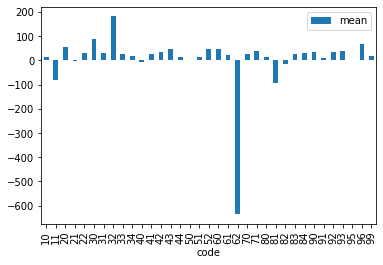

In [59]:
data_05_2 = pd.DataFrame({"code": code, "mean": per_05_2})
data_05_2.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.

### 6월 상반기 상대값 계산

In [60]:
is_date = card_05['receipt_dttm'] < 20200615
df_card06_1 = card_06[is_date]
df_card06_1.head()

,Unnamed: 0,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,0,20200601,11560,대림2동,80,주점,74,5471100
1,1,20200601,11200,성수2가1동,80,일반한식,429,11876060
2,2,20200601,11560,신길1동,90,기타건축자재,3,59800
3,3,20200601,11680,일원본동,40,슈퍼 마켓,145,2293030
4,4,20200601,11560,양평2동,71,사우나,12,102500


In [61]:
seoul06_sum_1 = []

is_code = df_card06_1['adstrd_code'] == 11110

for i in code:
    is_name = df_card06_1['mrhst_induty_cl_code'] == i
    seoul = df_card06_1[is_code & is_name]
    seoul = seoul.astype({'salamt' : int})
    sum_num = sum(seoul['salamt'])
    seoul06_sum_1.append(sum_num)
    
print(seoul06_sum_1)
print(code)

mean06_1 = []

for i in seoul06_sum_1:
    mean06_1.append(i/14)

Jongrogu06_1 = pd.DataFrame({'code' : code, 'total_sum' : seoul06_sum_1, 'mean' : mean06_1})
Jongrogu06_1

[668990715, 180897634, 749945356, 367896183, 310993291, 13163840, 510777530, 29492440, 248410047, 54862000, 6791201422, 87583106, 812249082, 406196642, 1046581751, 2607400252, 430666395, 58086547, 22835000, 289181034, 13252371907, 8800759318, 811224255, 15875991893, 8988000, 113234250, 904234169, 81145010, 109416396, 1388858709, 72557458, 253048824, 0, 16789200, -14278165815]
[10, 11, 20, 21, 22, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 50, 51, 52, 60, 61, 62, 70, 71, 80, 81, 82, 83, 84, 90, 91, 92, 93, 95, 96, 99]


,code,total_sum,mean
0,10,668990715,4.778505e+07
1,11,180897634,1.292126e+07
2,20,749945356,5.356753e+07
3,21,367896183,2.627830e+07
4,22,310993291,2.221381e+07
5,30,13163840,9.402743e+05
6,31,510777530,3.648411e+07
7,32,29492440,2.106603e+06
8,33,248410047,1.774357e+07
9,34,54862000,3.918714e+06


In [62]:
per_06_1 = []

for i in range(0, len(mean_total)) :
    a = mean_total[i]
    b = Jongrogu06_1['mean'][i]
    if(a != 0):
        per_06_1.append( ( ( b - a ) / a ) * 100 )
    else:
        per_06_1.append(0)
per_06_1

[7.662883536979942,
 -83.92967421294625,
 16.409453709787,
 -6.948079216384984,
 10.70231769328113,
 91.26539344779357,
 30.130596365885125,
 29.2220554658516,
 27.375774935453745,
 26.59713020233659,
 36.31814786693137,
 39.35089819017452,
 34.09665587929966,
 30.72495908576603,
 12.37872112407172,
 -2.504691433617233,
 -45.44410585067811,
 -4.377966501145687,
 35.15107568975338,
 18.77166313267213,
 859.8109623409078,
 10.008448526574488,
 2.6277551954246343,
 11.798969696400704,
 -94.3187083288099,
 7.94955809804168,
 6.043574497171005,
 -13.218539894809018,
 22.720932927392465,
 15.418229947802642,
 18.31729966883597,
 5.881607079239356,
 0,
 26.12604232083868,
 -18.73340140427206]

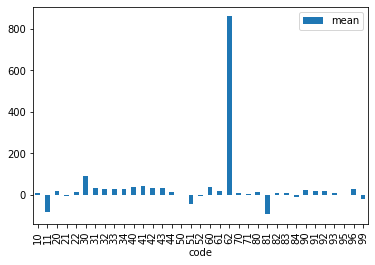

In [63]:
data_06_1 = pd.DataFrame({"code": code, "mean": per_06_1})
data_06_1.plot(x = "code", y = "mean", kind = 'bar')
# 95 항목은 이동통신 관련으로, 주로 용산구와 같은 곳에 몰려있다.